In [1]:
%load_ext autoreload
%autoreload 2

import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import io

from src.utils.figure import plot_lines
from src.utils.file import get_data_file_path
from src.utils.file import get_evaluation_file_path
from src.utils.metrics import metrics



# Data Presentation

In [2]:
presentation_row = 150
path = get_data_file_path(event_n=3, formula_n=3, count=2000)
data = pd.read_csv(path)

In [3]:
data.head()

,context,query,question,code,formula,answer,graph
0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
1,"Initially, event1 happened. After event3, no o...",C1: Event2 eventually happens.\nC2: If event2 ...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
2,"Initially, event2 happened. After event2, even...",C1: Event3 happens in the next state.\nC2: Eve...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
3,"Initially, event3 happened. After event1, eith...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."
4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   context   2000 non-null   object
 1   query     2000 non-null   object
 2   question  2000 non-null   object
 3   code      2000 non-null   object
 4   formula   2000 non-null   object
 5   answer    2000 non-null   bool  
 6   graph     2000 non-null   object
dtypes: bool(1), object(6)
memory usage: 95.8+ KB


In [5]:
# Context
print(data.loc[presentation_row, 'context'])

Initially, event1 happened. After event2, no other events can happen. After event1, event2 must happen. After event3, event1 must happen.


In [6]:
# Query 
print(data.loc[presentation_row, 'query'])

C1: Event3 does not happen.
C2: Event3 happens or C1 holds.
C3: C2 eventually holds.


In [7]:
# Question
print(data.loc[presentation_row, 'question'])

=== Context ===

Initially, event1 happened. After event2, no other events can happen. After event1, event2 must happen. After event3, event1 must happen.

=== Hypothesis ===

C1: Event3 does not happen.
C2: Event3 happens or C1 holds.
C3: C2 eventually holds.

C3 is True or False?



In [8]:
# Code
print(data.loc[presentation_row, 'code'])

MODULE main
VAR
    state : {event1, event2, event3};
ASSIGN
    init(state) := event1;
    next(state) := case
        state = event1 : event2;
		state = event2 : event2;
		state = event3 : event1;
    esac;
LTLSPEC (F ((state=event3) | (! (state=event3))))



In [9]:
# Formula
print(data.loc[presentation_row, 'formula'])

(F (event3 | (! event3)))


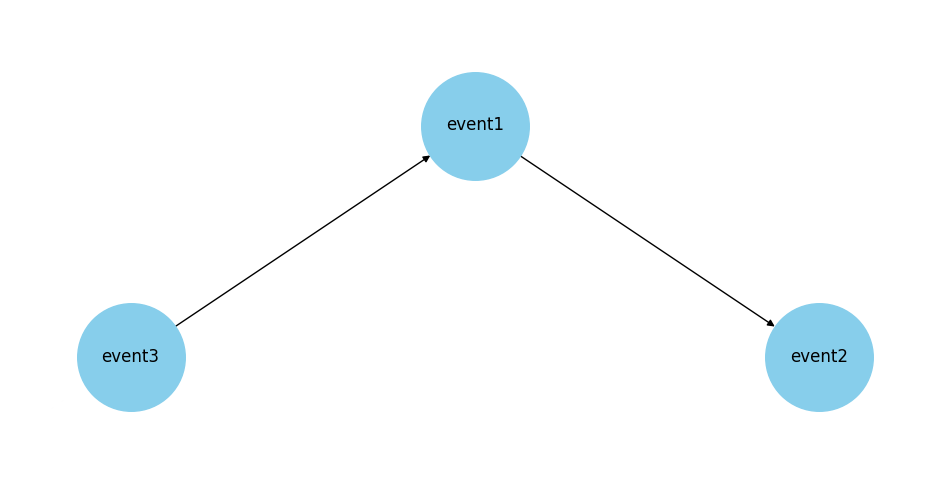

In [10]:
# Plot Graph
graph = nx.read_graphml(io.StringIO(data.loc[presentation_row, 'graph']))
plt.figure(figsize=(12, 6))
plt.xlim(-2.7,2.7)
plt.ylim(-1.0,3.0)
pos = {"event1": (0, 2), "event2": (2, 0), "event3": (-2,0)}
nx.draw(graph, pos, with_labels=True, node_size=6000, node_color='skyblue')
plt.show()

In [11]:
# Answer
print(data.loc[presentation_row, 'answer'])

True


# Prediction Presentation


In [25]:
strategy = "zero_shot_cot"  # Options: direct, zero_shot_cot, few_shot_cot, self_consistency, least_to_most
path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model="gpt-3.5-turbo")
path = path.replace('.csv', f'_{strategy}.csv')
data = pd.read_csv(path)

In [26]:
data.head()

,context,query,question,code,formula,answer,graph,prediction,prediction_raw
0,"Initially, event3 happened. After event1, even...",C1: Event1 happens or event2 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(X ((event1 | event2) & event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,"First, let's break down the hypothesis:\n\nC1:..."
1,"Initially, event1 happened. After event3, no o...",C1: Event2 eventually happens.\nC2: If event2 ...,"=== Context ===\n\nInitially, event1 happened....","MODULE main\nVAR\n state : {event1, event2,...",(G (event2 -> (F event2))),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,"First, let's identify what the hypothesis is a..."
2,"Initially, event2 happened. After event2, even...",C1: Event3 happens in the next state.\nC2: Eve...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",((X event3) -> (X event3)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",1.0,"First, let's identify what the hypothesis is a..."
3,"Initially, event3 happened. After event1, eith...",C1: Event2 happens and event3 happens.\nC2: Ev...,"=== Context ===\n\nInitially, event3 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! (event1 | (event2 & event3))),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,"First, let's break down the hypothesis:\n\nC1:..."
4,"Initially, event2 happened. After event1, even...",C1: Event3 happens or event3 happens.\nC2: C1 ...,"=== Context ===\n\nInitially, event2 happened....","MODULE main\nVAR\n state : {event1, event2,...",(! ((event3 | event3) | event1)),True,"<graphml xmlns=""http://graphml.graphdrawing.or...",0.0,"First, let's break down the hypothesis:\n\nC1:..."


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   context         2000 non-null   object 
 1   query           2000 non-null   object 
 2   question        2000 non-null   object 
 3   code            2000 non-null   object 
 4   formula         2000 non-null   object 
 5   answer          2000 non-null   bool   
 6   graph           2000 non-null   object 
 7   prediction      2000 non-null   float64
 8   prediction_raw  2000 non-null   object 
dtypes: bool(1), float64(1), object(7)
memory usage: 127.1+ KB


In [28]:
data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
data['prediction'] = data['prediction'].astype(int)

In [29]:
# Accuracy
print(f'{len(data[data["answer"] == data["prediction"]]) * 100 / len(data)}%')

55.2%


In [17]:
# Prediction Distribution
data['prediction'].value_counts()

prediction
1    1609
0     391
Name: count, dtype: int64

In [18]:
# Precision, Recall, F1
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(data['answer'], data['prediction'], average='macro')
recall = recall_score(data['answer'], data['prediction'], average='macro')
f1 = f1_score(data['answer'], data['prediction'], average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Precision: 0.5468909697529403
Recall: 0.5295
F1: 0.4814168397343819


# LLMs Evaluation


In [ ]:
models = ["gpt-3.5-turbo", "llama3:70b-instruct", "qwen:72b-chat", "gemma:7b-instruct", "qwen:7b-chat",
          "mistral:7b-instruct"]
strategies = ["direct", "zero_shot_cot", "few_shot_cot", "self_consistency", "least_to_most"]

## 1. LTLBench: Event 3, Operator 3, Count 2000

In [ ]:
strategy = "direct"  # Change this to compare different strategies
models_metrics = {}
for model in models:
    path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model=model)
    path = path.replace('.csv', f'_{strategy}.csv')
    if not os.path.exists(path):
        warnings.warn(f"Evaluation file of model {model} with strategy {strategy} does not exist.", UserWarning)
        continue
    data = pd.read_csv(path)
    data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
    data['prediction'] = data['prediction'].astype(int)
    models_metrics[model] = metrics(data)['raw']

df = pd.DataFrame(models_metrics)
df.transpose()

In [37]:
# large models mean
df.transpose().loc[['gpt-3.5-turbo', 'llama3:70b-instruct', 'qwen:72b-chat']].mean()

accuracy     0.582500
precision    0.586903
recall       0.582500
f1           0.576425
auc          0.582500
dtype: float64

In [38]:
# small models mean
df.transpose().loc[['gemma:7b-instruct', 'qwen:7b-chat', 'mistral:7b-instruct']].mean()

accuracy     0.543167
precision    0.553510
recall       0.543167
f1           0.521885
auc          0.543167
dtype: float64

## 2. Event 2, Operator 1-9, Count 300

In [ ]:
strategy = "direct"  # Change this to compare different strategies
event_n = 2
count = 300
formulas = [1, 2, 3, 4, 5, 7, 9]

models_data_df = pd.DataFrame()
for model in models:
    data = {}
    for formula_n in formulas:
        path = get_evaluation_file_path(event_n=event_n, formula_n=formula_n, count=count, model=model)
        path = path.replace('.csv', f'_{strategy}.csv')
        if not os.path.exists(path):
            warnings.warn(f"Evaluation file of model {model} with strategy {strategy} does not exist.", UserWarning)
            continue
        df = pd.read_csv(path)
        df['answer'] = df['answer'].apply(lambda x: 1 if x else 0)
        df['prediction'] = df['prediction'].astype(int)
        data[formula_n] = metrics(df)['raw']
    df = pd.DataFrame(data).transpose().reset_index().rename(columns={'index': 'number_of_operators'})
    df['model'] = model
    models_data_df = pd.concat([models_data_df, df], ignore_index=True)

models_data_df

### 2.1. Accuracy

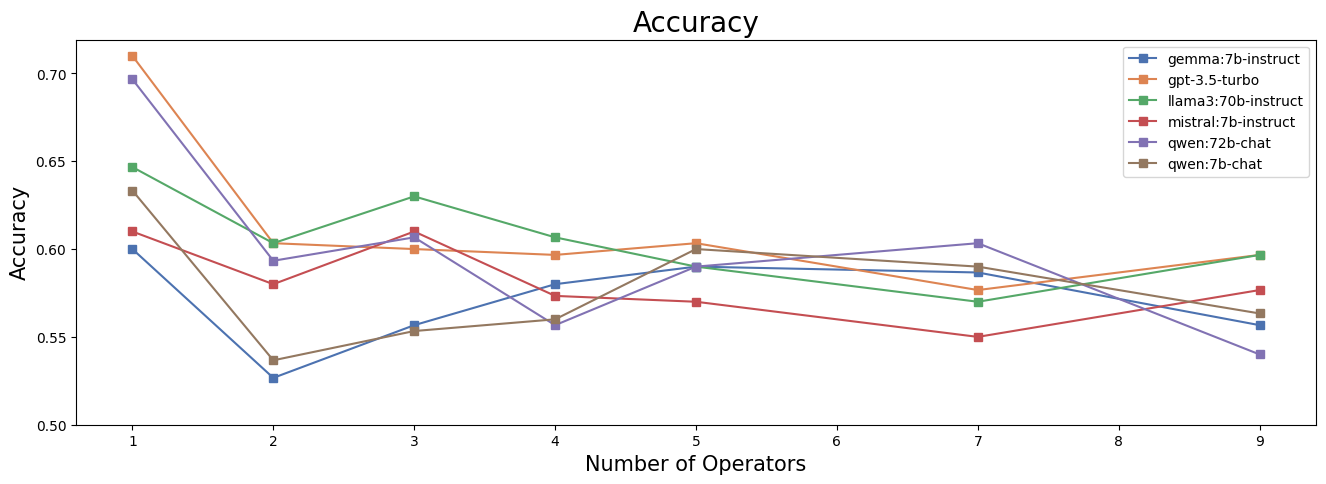

In [40]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='accuracy', z='model', title='Accuracy', x_label='Number of Operators',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.2. Precision

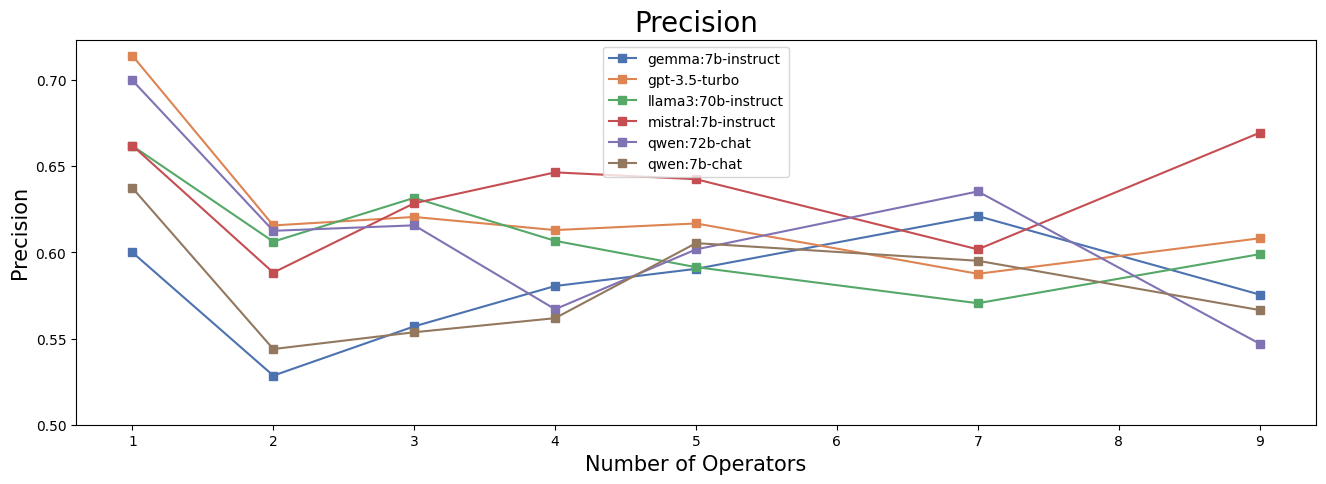

In [41]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='precision', z='model', title='Precision', x_label='Number of Operators',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.3. Recall

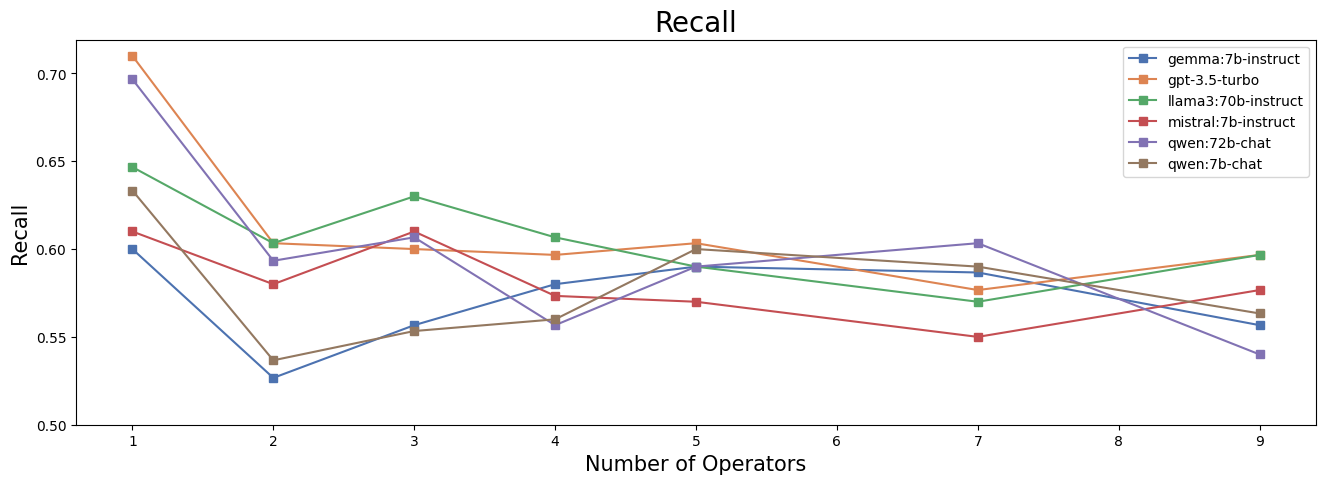

In [42]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='recall', z='model', title='Recall', x_label='Number of Operators',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

### 2.4. F1

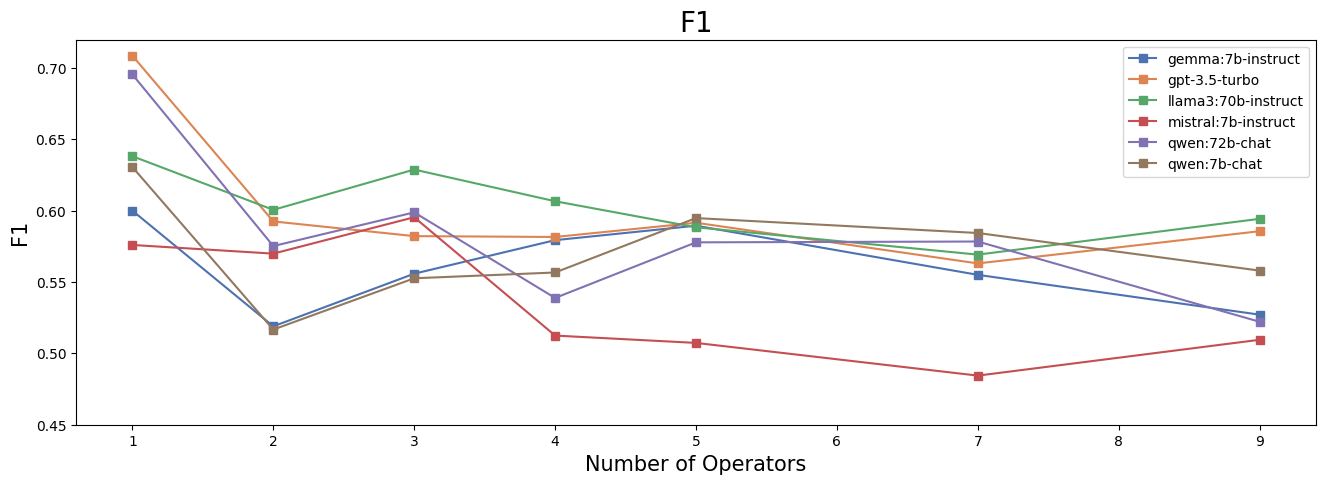

In [43]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.45, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='f1', z='model', title='F1', x_label='Number of Operators', y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

### 2.5. AUC

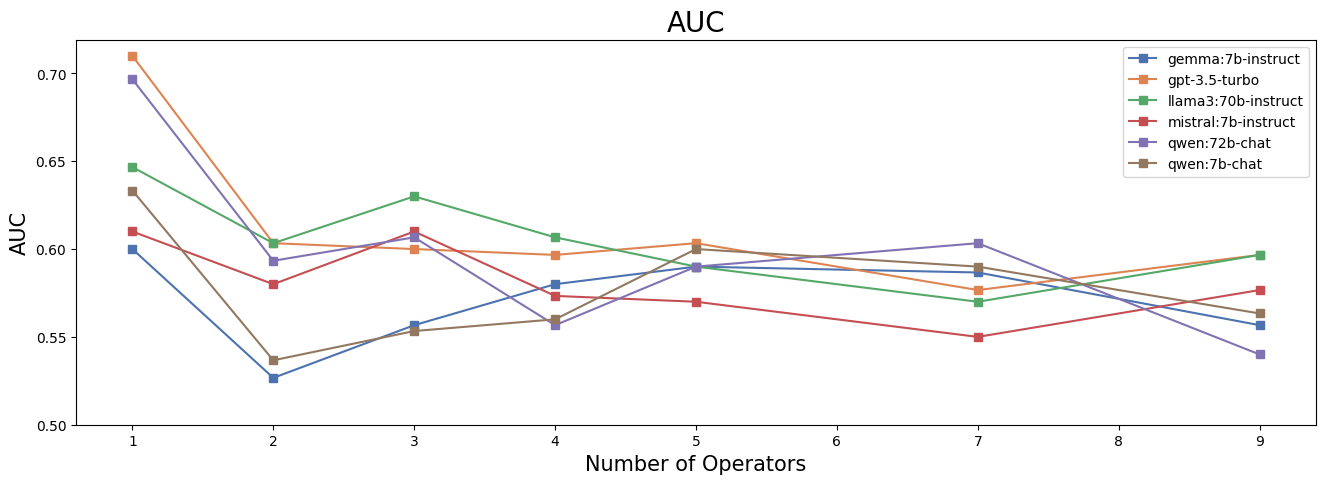

In [44]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.75, 0.05))
plot_lines(models_data_df, x='number_of_operators', y='auc', z='model', title='AUC', x_label='Number of Operators', y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

## 3. Operator 2, Event 2-9, Count 300

In [ ]:
strategy = "direct"  # Change this to compare different strategies
count = 300
formulas = 2
events_n = [2, 3, 4, 5, 7, 9]

models_data_df = pd.DataFrame()
for model in models:
    data = {}
    for e_n in events_n:
        path = get_evaluation_file_path(event_n=e_n, formula_n=formulas, count=count, model=model)
        path = path.replace('.csv', f'_{strategy}.csv')
        if not os.path.exists(path):
            warnings.warn(f"Evaluation file of model {model} with strategy {strategy} does not exist.", UserWarning)
            continue
        df = pd.read_csv(path)
        df['answer'] = df['answer'].apply(lambda x: 1 if x else 0)
        df['prediction'] = df['prediction'].astype(int)
        data[e_n] = metrics(df)['raw']
    df = pd.DataFrame(data).transpose().reset_index().rename(columns={'index': 'number_of_events'})
    df['model'] = model
    models_data_df = pd.concat([models_data_df, df], ignore_index=True)

models_data_df

### 3.1. Accuracy

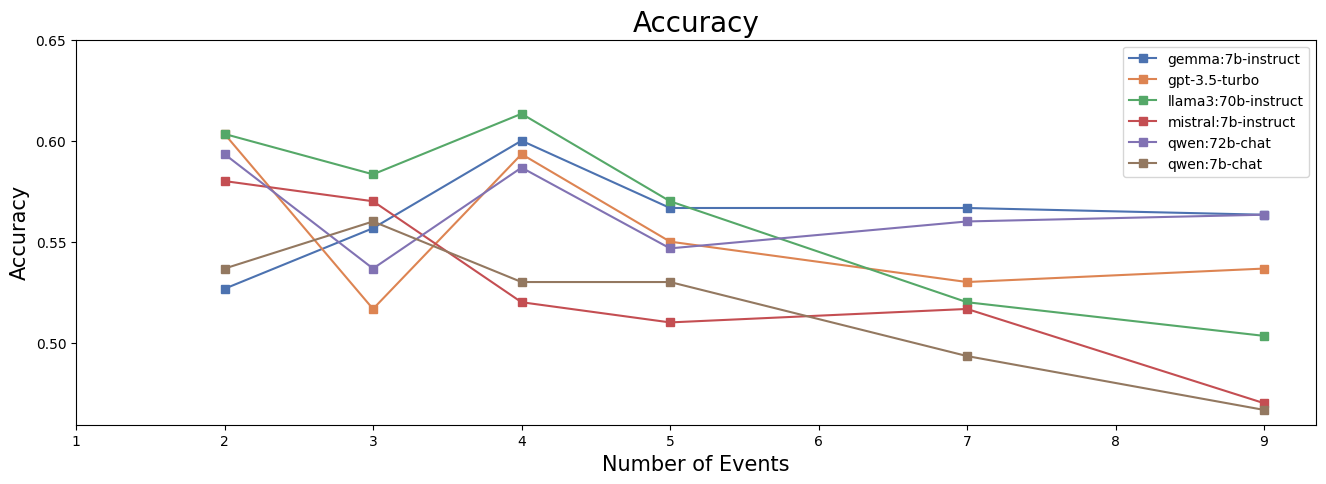

In [46]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='accuracy', z='model', title='Accuracy', x_label='Number of Events',
           y_label='Accuracy', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.2. Precision

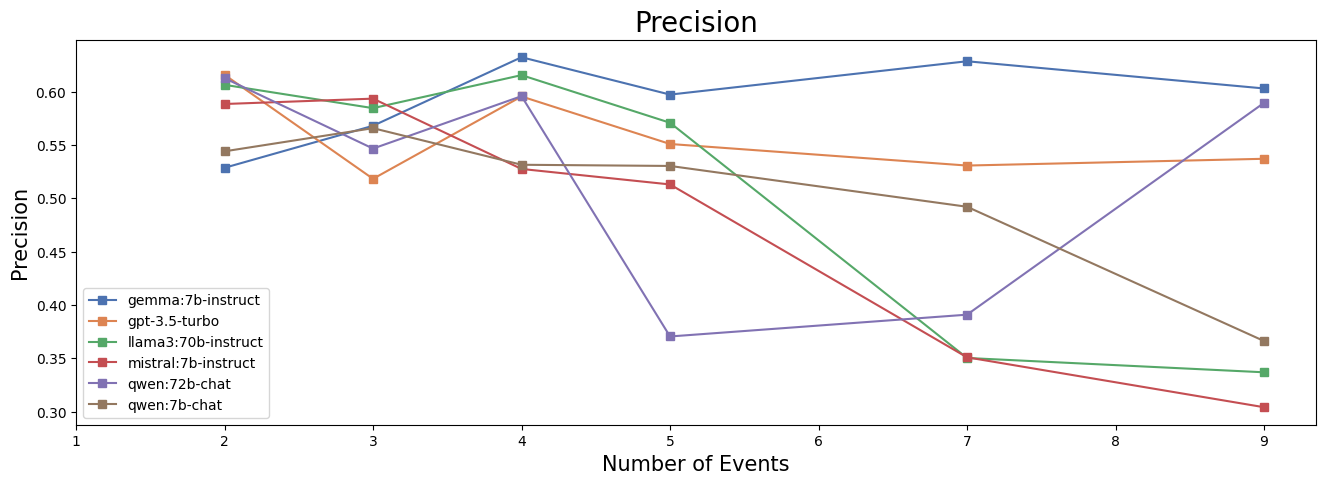

In [47]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='precision', z='model', title='Precision', x_label='Number of Events',
           y_label='Precision', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.3. Recall

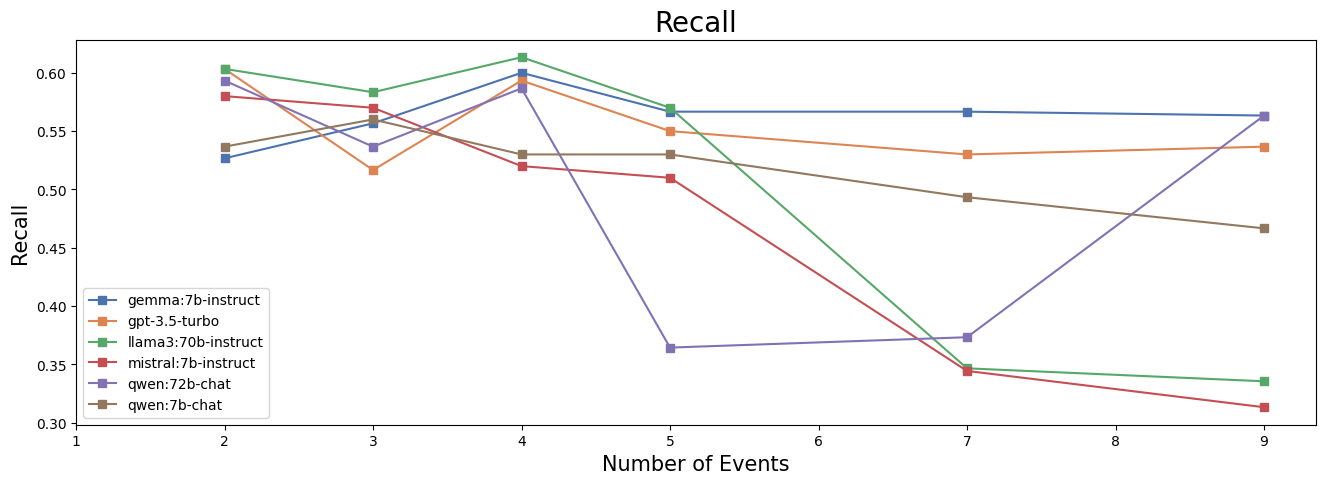

In [48]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='recall', z='model', title='Recall', x_label='Number of Events',
           y_label='Recall', x_ticks=x_ticks, y_ticks=y_ticks)

### 3.4. F1

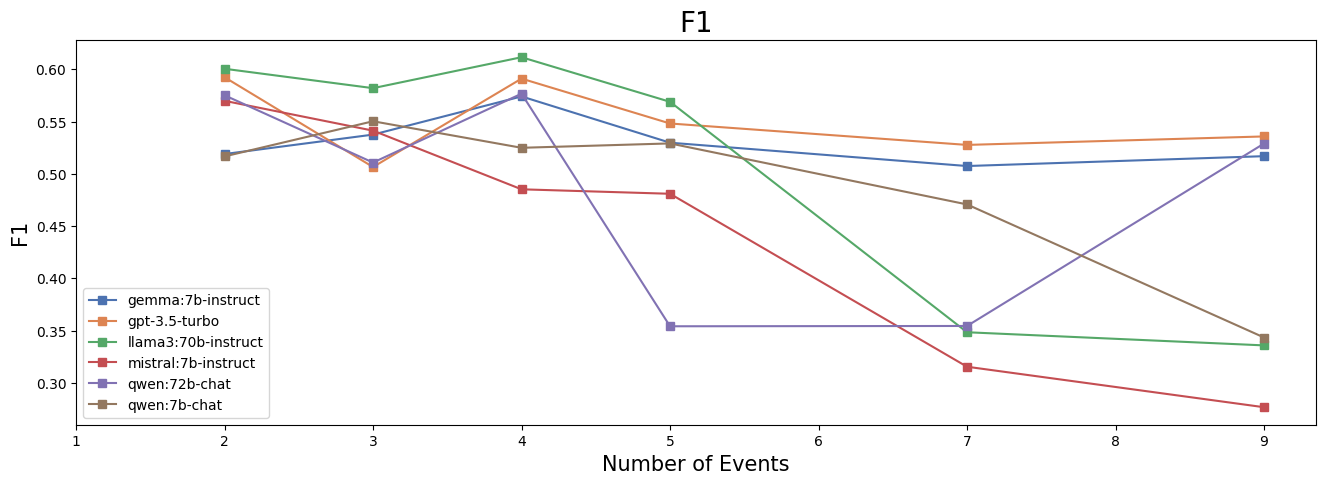

In [49]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.3, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='f1', z='model', title='F1', x_label='Number of Events', y_label='F1',
           x_ticks=x_ticks, y_ticks=y_ticks)

### 3.5. AUC

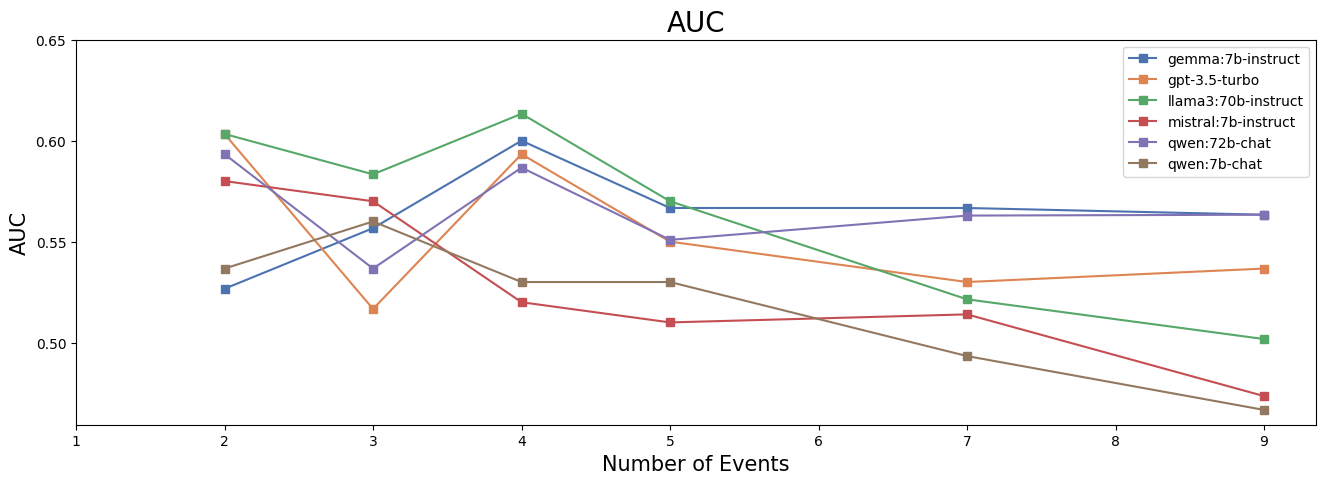

In [50]:
x_ticks = list(np.arange(1, 10))
y_ticks = list(np.arange(0.5, 0.65, 0.05))
plot_lines(models_data_df, x='number_of_events', y='auc', z='model', title='AUC', x_label='Number of Events', y_label='AUC',
           x_ticks=x_ticks, y_ticks=y_ticks)

## 4. Prompt Strategy Comparison

In [ ]:
# Compare all strategies for a specific model
model = "gpt-4"  # Change this to the model you want to analyze
strategies_metrics = {}

for strategy in strategies:
    path = get_evaluation_file_path(event_n=3, formula_n=3, count=2000, model=model)
    path = path.replace('.csv', f'_{strategy}.csv')
    if not os.path.exists(path):
        warnings.warn(f"Evaluation file for {model} with strategy {strategy} does not exist.", UserWarning)
        continue
    data = pd.read_csv(path)
    data['answer'] = data['answer'].apply(lambda x: 1 if x else 0)
    data['prediction'] = data['prediction'].astype(int)
    strategies_metrics[strategy] = metrics(data)['raw']

df = pd.DataFrame(strategies_metrics)
df.transpose()